#                                      NLP - Assignment 1    

In [2]:
# find brown corpus library:
import nltk
nltk.corpus.brown

<CategorizedTaggedCorpusReader in '/home/noam/nltk_data/corpora/brown'>

In [3]:
# Brown corpus path - /home/noam/nltk_data/corpora/brown'

In [4]:
import google3 as g
import nltk
# google() returns a dictionary, with 10 keys, each an url for a search result. Each associated value holds a tuple
# of length 3. First element is raw html, seconed is raw cleaned text, and third is a tokenized list of words. 
search_string = "Natural language processing"
results = g.google(search_string)
# AnalyzeResults() Writes search results to files, in a directory called Data. it creates two text files for each 
# resulting url, one for the raw text, and one for the list of tokenized words. 
g.AnalyzeResults(results)

In [5]:
text = open("Data/Raw-0.txt", 'r').read()
tokenized_text = nltk.word_tokenize(text)
## TODO: What is best pos_tagger?
word_tag_list = nltk.pos_tag(tokenized_text, tagset='universal')
# word_tag_list if a list of tuples of length 2, with (word, Tag)

In [6]:
# In order to add the resulting tagged text to the brown corpus, we must change it to the form:
# /n/n/t word1/tag1 word2/tag2 ...


In [7]:
for i in range(len(word_tag_list)): 
    if (word_tag_list[i] == ('.','.') or word_tag_list[i] == ('?','.') ): 
        word_tag_list.insert(i+1, ('\n\n\n\t',""))
        i += 2

# Merge all couples to form ['word1/tag1', 'word2/tag2' ...]
wordtag_list = [word + "/" + tag for (word, tag) in word_tag_list]
# Remove '/' at sentance start:
for i in range(len(wordtag_list)): 
    if wordtag_list[i] == '\n\n\n\t/':
        wordtag_list[i] = '\n\n\n\t'

In [8]:
wordtag_joined = " ".join(wordtag_list)



In [9]:
print(wordtag_joined)

By/ADP submitting/VERB my/PRON Email/NOUN address/NOUN I/PRON confirm/VERB that/ADP I/PRON have/VERB read/VERB and/CONJ accepted/VERB the/DET Terms/NOUN of/ADP Use/NOUN and/CONJ Declaration/NOUN of/ADP Consent/NOUN ./. 


	 By/ADP submitting/VERB your/PRON email/NOUN address/NOUN ,/. you/PRON agree/VERB to/PRT receive/VERB emails/NOUN regarding/VERB relevant/ADJ topic/NOUN offers/NOUN from/ADP TechTarget/NOUN and/CONJ its/PRON partners/NOUN ./. 


	 You/PRON can/VERB withdraw/VERB your/PRON consent/NOUN at/ADP any/DET time/NOUN ./. 


	 Contact/VERB TechTarget/NOUN at/ADP 275/NUM Grove/NOUN Street/NOUN ,/. Newton/NOUN ,/. MA/NOUN ./. 


	 You/PRON also/ADV agree/VERB that/ADP your/PRON personal/ADJ information/NOUN may/VERB be/VERB transferred/VERB and/CONJ processed/VERB in/ADP the/DET United/NOUN States/NOUN ,/. and/CONJ that/ADP you/PRON have/VERB read/VERB and/CONJ agree/VERB to/PRT the/DET Terms/NOUN of/ADP Use/NOUN and/CONJ the/DET Privacy/NOUN Policy/NOUN ./. 


	 The/DET develo





## 1.1.2 Gathering Basic Statistics


#### Write a function that plots the number of words having a given number of tags. The X-axis should show the number of tags and the Y-axis the number of words having exactly this number of tags.

In [10]:
from collections import defaultdict
from nltk.corpus import brown

In [11]:
# Return dict: key -> word, dict[word] -> list of distinct tags for word. 
def map_word2tags(tagged_words_list):
    # Create dictionary with key:word value: list of possible tags. 
    word_tags = defaultdict(lambda: [])
    for (word, tag) in tagged_words_list: 
        if tag not in word_tags[word]:
            word_tags[word] += [tag]
    return word_tags

# Return a list of (num_words, num_tags)
def num_words_with_x_tags(debug=1):
    # Get list of all tagged words with largest tagset. 
#     tagged_words_list = brown.tagged_words(tagset='universal')
    tagged_words_list = brown.tagged_words()
    words = set(brown.words())
    word_tags = map_word2tags(tagged_words_list)
    # Dictionary mapping word with i tags 
    map_words_tags = defaultdict(lambda: 0)
    for word in word_tags: 
        map_words_tags[len(word_tags[word])] +=1
    
    if debug:
#         for word in map_words_tags: 
#             print("There are ", map_words_tags[word], "words, with ", word, "tags. \n")
            print(list((index, map_words_tags[index]) for index in map_words_tags))
    

In [12]:
words_wnt = num_words_with_x_tags()

[(1, 47328), (2, 7186), (3, 1146), (4, 265), (5, 87), (6, 27), (7, 12), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1)]


In [13]:
%matplotlib inline

def display():
    import pylab
    words_by_freq = num_words_with_x_tags()
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 * pylab.arange(15)
    perfs = words_by_freq
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

    
def display2():
    import matplotlib.pyplot as plt
    default_tagset_mapping = [(1, 47328), (2, 7186), (3, 1146), (4, 265), (5, 87), (6, 27), (7, 12), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1)]
    universal_tagset_mapping = [(1, 52454), (2, 3334), (3, 231), (4, 32), (5, 6)]
    plt.plot([x for (x,y) in universal_tagset_mapping], [y for (x,y) in universal_tagset_mapping])
    plt.axis([0, 13, 0, 55000])
    plt.xlabel('X - Number of tags')
    plt.ylabel('Y - Number of words with X tags')
    plt.title('Universal tagset')
    plt.show()
    
    plt.plot([x for (x,y) in default_tagset_mapping], [y for (x,y) in default_tagset_mapping])
    plt.axis([0, 13, 0, 55000])
    plt.xlabel('X - Number of tags')
    plt.ylabel('Y - Number of words with X tags')
    plt.title('Default tagset')
    plt.show()
    
    uni_x = [x for (x,y) in universal_tagset_mapping]
    uni_y = [y for (x,y) in universal_tagset_mapping]
    
    def_x = [x for (x,y) in default_tagset_mapping]
    def_y = [y for (x,y) in default_tagset_mapping]
    plt.plot(uni_x, uni_y, 'b', def_x, def_y, 'g' )    

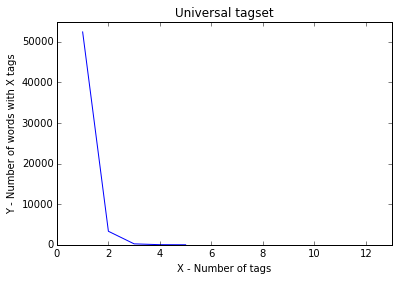

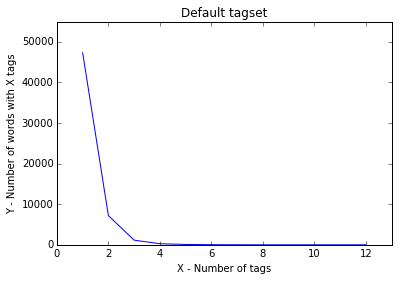

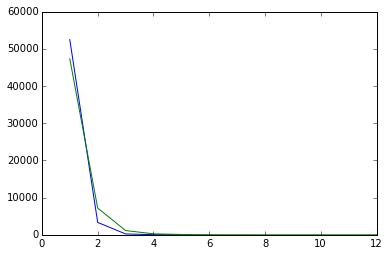

In [14]:
display2()

#### Write a Python function that finds words with more than N observed tags. The function should return a ConditionalFreqDist object where the conditions are the words and the frequency distribution indicates the tag frequencies for each word.

In [15]:
def words_w_N_tags(tag_num):
    # Get list of (word, tag) for all words in corpus. 
    tagged_words_list = brown.tagged_words(tagset='universal')
    # Create dictionary with list of distinct tags for each word. 
    unique_tags_word = map_word2tags(tagged_words_list)
    # Filter out words with less than tag_num unique tags. return list of words. 
    words_w_n_unique_tags = [ w for w in unique_tags_word  if len(unique_tags_word[w]) >= tag_num]
    # Iterate through all pairs of tagged words and filter out all words with less than tag_num unique tags. 
    data = [(w, t) for (w, t) in tagged_words_list if w in words_w_n_unique_tags ]
    cfd = nltk.ConditionalFreqDist(data)    
    return cfd

Now we can run words_w_N_tags to see the frequency of each returned flag, with different tags as conditions.  
We can use the tabulate() and plot() functions to see what kind of information is returned and if it makes any sense.


       ADJ  ADP  ADV  DET NOUN PRON  PRT VERB    X 
 damn   13    0    1    0    4    0    3    6    0 
 down    1  190    0    0    1    0  694    2    0 
round   28    4   14    0   18    0    0    6    0 
 that    0 6422   54 1981    0 1779    0    0    1 
   to    0 10985    1    0    1    0 14742    0    3 
 well   14    0  700    0   17    0   22    4    0 


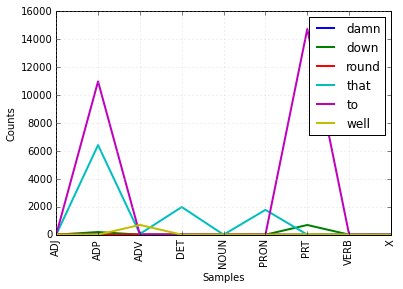

In [16]:
cfd = words_w_N_tags(5)
cfd.tabulate()
cfd.plot()

#### Write a test function that verifies that the words indeed have more than N distinct tags in the returned value.

In [17]:
N=5
cfd = words_w_N_tas(N)

# TODO: what function should do exactly, what return, check vs original brown.tagged_words? add N -> %
def verify_n_tags(cfd, n):
    msg = "All words have N categories or more."
    for word in cfd:
        l = [x for x in cfd[word].keys() if cfd[word][x] > 0]
        if len(l) < n: 
            msg = "Not all words have N categories or more. "
            continue
    print(msg)



NameError: name 'words_w_N_tas' is not defined

In [ ]:
verify_n_tags(cfd, N)

#### Write a function that given a word, finds one example of usage of the word with each of the different tags in which it can occur.

In [44]:
def print_sentence(sent, word, tag):
    print(sent)
#     abc = "abcdefghijklmnopqrstuvwxyzABCDEFJHIJKLMNOPQRSTUVWXYZ"
# #     for i in range(len(sent)):
# #         if sent[i][1] not in abc:
# #             sent[i-1] = (str(sent[i-1][0]) + str(sent[i][0]), sent[i-1][1])
# #             del sent[i-1]
# #             i += 1
#     words = [ word for (word, tag) in sent ]
#     sent_str = " ".join(words)
#     print(sent_str)          
    words = [word for (word, tag) in sent]
    sent_str = " ".join(words)
    sent_str = sent_str.replace(' .', '.')
    sent_str = sent_str = sent_str.replace(' ,', '.')
    sent_str = sent_str.replace(' ?', '?')
    sent_str = sent_str.replace(' !', '!')
    sent_str = sent_str.replace(' :', ':')
    sent_str = sent_str.replace(' ;', ';')
    print("Word: ", word, "with tag: ", tag, '\n', sent_str,'\n')
    
#     twords = [word for word in untag(sent)]
    print(" ".join(twords))
    
def use_example(word):
    words2unique_tags = map_word2tags(brown.tagged_words())
    list_of_unique_tags = words2unique_tags[word]
    sents = brown.tagged_sents()
    for tag in list_of_unique_tags: 
        index = 0
        for sent in sents:
            index += 1
            if (word, tag) in sent:
                print_sentence(sent, word, tag)
                break
                
def showExamples(word, cfd, corpus):
    words2unique_tags = map_word2tags(brown.tagged_words())
    list_of_unique_tags = words2unique_tags[word]
    sents = brown.tagged_sents()
    for tag in list_of_unique_tags: 
        index = 0
        for sent in sents:
            index += 1
            if (word, tag) in sent:
                print_sentence(sent, word, tag)
                break
                

In [45]:
use_example('damn')

[('A', 'AT'), ('fellow', 'NN'), ('came', 'VBD'), ('up', 'RP'), ('to', 'IN'), ('me', 'PPO'), (',', ','), ('a', 'AT'), ('Senator', 'NN-TL'), (',', ','), ('I', 'PPSS'), ("don't", 'DO*'), ('have', 'HV'), ('to', 'TO'), ('tell', 'VB'), ('you', 'PPO'), ('his', 'PP$'), ('name', 'NN'), (',', ','), ('and', 'CC'), ('he', 'PPS'), ('told', 'VBD'), ('me', 'PPO'), (',', ','), ("'", "'"), ('I', 'PPSS'), ('love', 'VB'), ('the', 'AT'), ('President', 'NN-TL'), ('like', 'CS'), ('a', 'AT'), ('brother', 'NN'), (',', ','), ('but', 'CC'), ('God', 'NP'), ('damn', 'VB'), ('it', 'PPO'), (',', ','), ("he's", 'PPS+BEZ'), ('crucifying', 'VBG'), ('me', 'PPO'), ('.', '.')]
Word:  damn with tag:  VB 
 A fellow came up to me. a Senator. I don't have to tell you his name. and he told me. ' I love the President like a brother. but God damn it. he's crucifying me. 



NameError: name 'untag' is not defined

## 1.2 Unigram and Affix Tagger

For this task, split the Brown corpus in 3 parts: training set is the first 80% of the sentences; development set the next 10%; 

In [158]:
tagged_sentences= nltk.corpus.brown.tagged_sents()
percent_80 = int(0.8*len(tagged_sentances))
percent_10 = int(0.1*len(tagged_sentances))
train_set = tagged_sentences[:percent_80] #First 80% of corpus.
develop_set = tagged_sentences[percent_80 : percent_80 + percent_10 ] #10% of corpus. 
test_set = tagged_sentences[percent_80 + percent_10:] #10% of corpus.

When trying to approach this question, We were met with some difficulty. For starts, looking for the unigram tagger source code (Our's should be shorter...), turned out to be counter intuitive. Nltk documentation (at least at this stage), still alludes us. 

The seconed hardship, was met while reading the code. We expected the Unigram tagger to be more basic than the Ngram. 

A few hours of our lives were also wasted (invested!) in 

In [154]:
from nltk.tag.api import TaggerI
from collections import defaultdict
from nltk import FreqDist, ConditionalFreqDist
# TODO: 1) what doues tagger expect? 1 word, sequence? what should return? 
#       2) why third tuple argument? "None"
class SimpleUnigramTagger(TaggerI):
    """
    A simple uni (one word) tagger, implementing minimum functionlatiy.  
    Will recieve a training data set, of tuples (word_i, tag). 
    
    
    A processing interface for assigning a tag to each token in a list.
    Tags are case sensitive strings that identify some property of each
    token, such as its part of speech or its sense.

    Some taggers require specific types for their tokens.  This is
    generally indicated by the use of a sub-interface to ``TaggerI``.
    For example, featureset taggers, which are subclassed from
    ``FeaturesetTagger``, require that each token be a ``featureset``.

    Subclasses must define:
      - either ``tag()`` or ``tag_sents()`` (or both)
    """
    
    def __init__(self, training_data = None, model = None):
        
        self._check_params(training_data, model)
        if training_data:
            self._train(training_data)
            
    # Return = dict, mapping: word --> tag, 
    # Each known word will receive it's most common tag. 
    # Unkwon words will be tagged 'None'. 
    # Function expects list of tuples (word, tag). 
    def _train(self, training_data):
        # Create conditional freq dist, mapping each word to all it's tags. 
        cfd = ConditionalFreqDist()
        for sentence in training_data: 
            for word, tag in sentence: 
                cfd[word][tag] += 1
        self.cfd = cfd
    
    def tag_or_none(self, token):
            if token in self.cfd:
                return self.cfd[token].max()
            else:
                return None
            
    def tag(self, tokens):
        """
        Determine the most appropriate tag sequence for the given
        token sequence, and return a corresponding list of tagged
        tokens.  A tagged token is encoded as a tuple ``(token, tag)``.
        
        :rtype: list(tuple(str, str))
        
        """
            
        return [(tok, self.tag_or_none(tok)) for tok in tokens]
    
    
    def tag_sents(self, sentences):
        """
        Apply ``self.tag()`` to each element of *sentences*.  I.e.:

            return [self.tag(sent) for sent in sentences]
        """
        return [self.tag(sent) for sent in sentences]

In [156]:
t1 = nltk.UnigramTagger(train_set)
t = SimpleUnigramTagger(train_set)



In [157]:
show_some = 15 # We will want to watch just first few tagged 
simple_test = t.tag_sents(test_set)
unigram_test = t1.tag_sents(test_set)
print("Our new tagger: " , simple_test[:show_some])
print("Nltk's Unigram_tagger: ", unigram_test[:show_some])
print("Are they equal? ", simple_test == unigram_test)

Our new tagger:  [[(('He', 'PPS'), None), (('was', 'BEDZ'), None), (('about', 'RB'), None), (('50', 'CD'), None), (('years', 'NNS'), None), (('old', 'JJ'), None), (('.', '.'), None)], [(('``', '``'), None), (('Another', 'DT'), None), (('young', 'JJ'), None), (('man', 'NN'), None), ((',', ','), None), (('my', 'PP$'), None), (('dear', 'NN'), None), (('?', '.'), None), (('?', '.'), None)], [(('Really', 'RB'), None), ((',', ','), None), (('you', 'PPSS'), None), (('are', 'BER'), None), (('most', 'QL'), None), (('indiscreet', 'JJ'), None), (('to', 'TO'), None), (('drive', 'VB'), None), (('him', 'PPO'), None), (('here', 'RB'), None), (('yourself', 'PPL'), None), (("''", "''"), None), ((',', ','), None), (('he', 'PPS'), None), (('said', 'VBD'), None), ((',', ','), None), (('frowning', 'VBG'), None), (('with', 'IN'), None), (('displeasure', 'NN'), None), (('.', '.'), None)], [(('Delphine', 'NP'), None), (('presented', 'VBD'), None), (('her', 'PP$'), None), (('cheek', 'NN'), None), (('for', 'IN'

In [110]:

#t1 = nltk.UnigramTagger(train_set[:10])